https://geemap.org/notebooks/112_cartoee_basemap/#global-scale-maps
112 cartoee basemap
creating publication-quality maps with a variety of basemaps to choose from

Importar librerías

In [1]:
%pylab inline

import ee
import geemap

# import the cartoee functionality from geemap
from geemap import cartoee
import cartopy.io.img_tiles as cimgt

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Inicializar Earth Engine

In [2]:
geemap.ee_initialize()

Añadir conjunto de datos Earth Engine

In [3]:
# get a landsat image to visualize
image = ee.Image('LANDSAT/LC08/C01/T1_SR/LC08_044034_20140318')

# define the visualization parameters to view
vis = {"bands": ['B5', 'B4', 'B3'], "min": 0, "max": 5000, "gamma": 1.3}

Usar mapa base Google

/home/yoviajo/anaconda3/envs/geemap_env/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


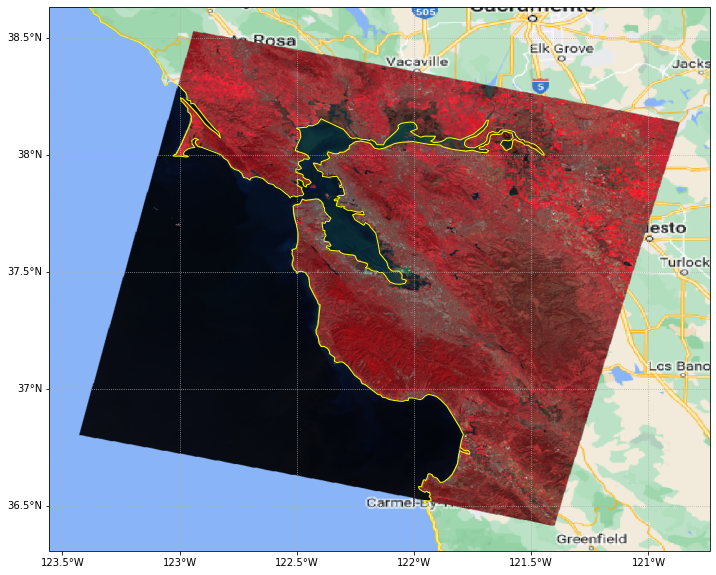

In [4]:
fig = plt.figure(figsize=(15, 10))

# use cartoee to get a map
ax = cartoee.get_map(image, vis_params=vis, basemap='ROADMAP', zoom_level=8)

# pad the view for some visual appeal
cartoee.pad_view(ax)

# add the gridlines and specify that the xtick labels be rotated 45 degrees
cartoee.add_gridlines(ax, interval=0.5, xtick_rotation=0, linestyle=":")

# add the coastline
ax.coastlines(color="yellow")

plt.show()

Usar mapa base Stamen Terrain

In [5]:
basemap = cimgt.Stamen('terrain-background')

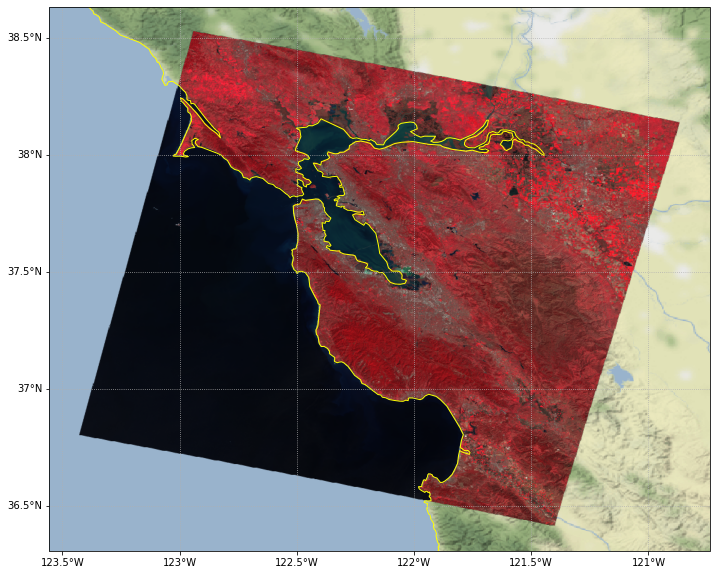

In [6]:
fig = plt.figure(figsize=(15, 10))

# use cartoee to get a map
ax = cartoee.get_map(image, vis_params=vis, basemap=basemap, zoom_level=8)

# pad the view for some visual appeal
cartoee.pad_view(ax)

# add the gridlines and specify that the xtick labels be rotated 45 degrees
cartoee.add_gridlines(ax, interval=0.5, xtick_rotation=0, linestyle=":")

# add the coastline
ax.coastlines(color="yellow")

plt.show()

Usar mapa base OpenStreetMap

In [7]:
basemap = cimgt.OSM()

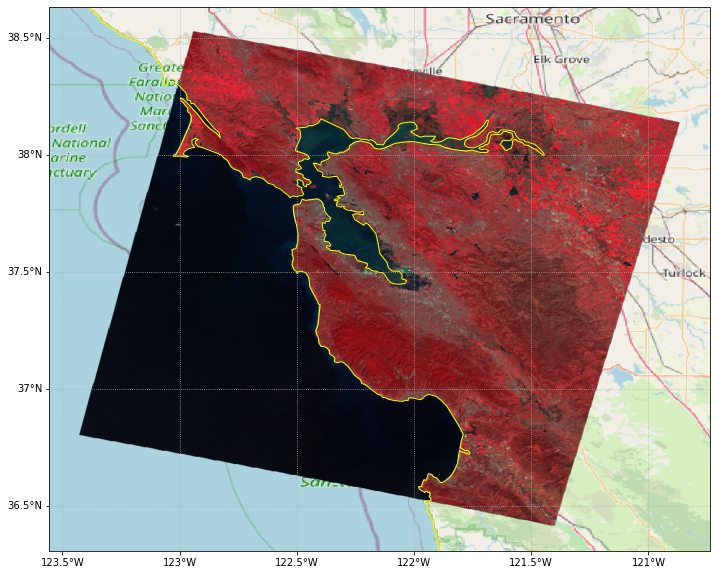

In [8]:
fig = plt.figure(figsize=(15, 10))

# use cartoee to get a map
ax = cartoee.get_map(image, vis_params=vis, basemap=basemap, zoom_level=8)

# pad the view for some visual appeal
cartoee.pad_view(ax)

# add the gridlines and specify that the xtick labels be rotated 45 degrees
cartoee.add_gridlines(ax, interval=0.5, xtick_rotation=0, linestyle=":")

# add the coastline
ax.coastlines(color="yellow")

plt.show()

Añadir texto

In [9]:
from matplotlib.transforms import offset_copy
import cartopy.crs as ccrs

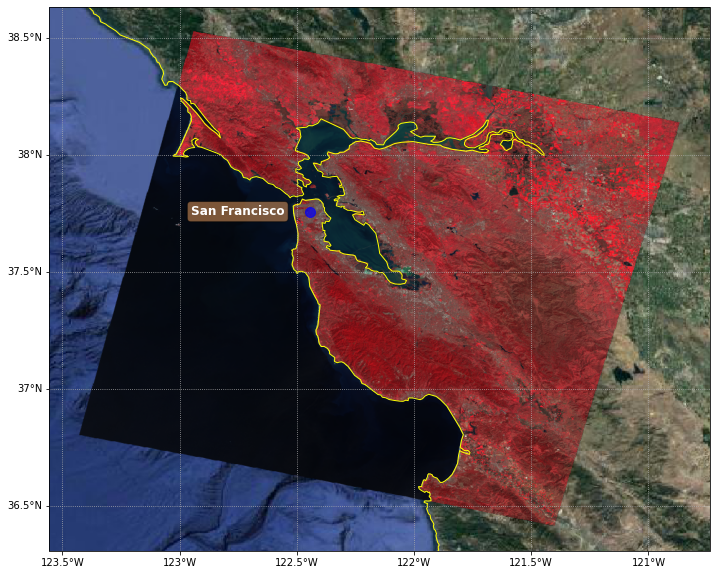

In [10]:
fig = plt.figure(figsize=(15, 10))

# use cartoee to get a map
ax = cartoee.get_map(image, vis_params=vis, basemap='SATELLITE', zoom_level=8)

# pad the view for some visual appeal
cartoee.pad_view(ax)

# add the gridlines and specify that the xtick labels be rotated 45 degrees
cartoee.add_gridlines(ax, interval=0.5, xtick_rotation=0, linestyle=":")

# add the coastline
ax.coastlines(color="yellow")

plt.plot(
    -122.4457,
    37.7574,
    marker='o',
    color='blue',
    markersize=10,
    alpha=0.7,
    transform=ccrs.Geodetic(),
)

# Use the cartopy interface to create a matplotlib transform object
# for the Geodetic coordinate system. We will use this along with
# matplotlib's offset_copy function to define a coordinate system which
# translates the text by 25 pixels to the left.
geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax)
text_transform = offset_copy(geodetic_transform, units='dots', x=-25)

plt.text(
    -122.4457,
    37.7574,
    u'San Francisco',
    verticalalignment='center',
    horizontalalignment='right',
    transform=text_transform,
    fontsize='large',
    fontweight='bold',
    color='white',
    bbox=dict(facecolor='sandybrown', alpha=0.5, boxstyle='round'),
)

# Save the plot by calling plt.savefig() BEFORE plt.show()
plt.savefig('sfo.pdf')
plt.savefig('sfo.jpg', dpi=300)

plt.show()

Mapas de escala global

In [11]:
# get an earth engine image of ocean data for Jan-Mar 2018
ocean = (
    ee.ImageCollection('NASA/OCEANDATA/MODIS-Terra/L3SMI')
    .filter(ee.Filter.date('2018-01-01', '2018-03-01'))
    .median()
    .select(["sst"], ["SST"])
)

In [12]:
# set parameters for plotting
# will plot the Sea Surface Temp with specific range and colormap
visualization = {'bands': "SST", 'min': -2, 'max': 30}
# specify region to focus on
bbox = [180, -88, -180, 88]

/home/yoviajo/anaconda3/envs/geemap_env/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


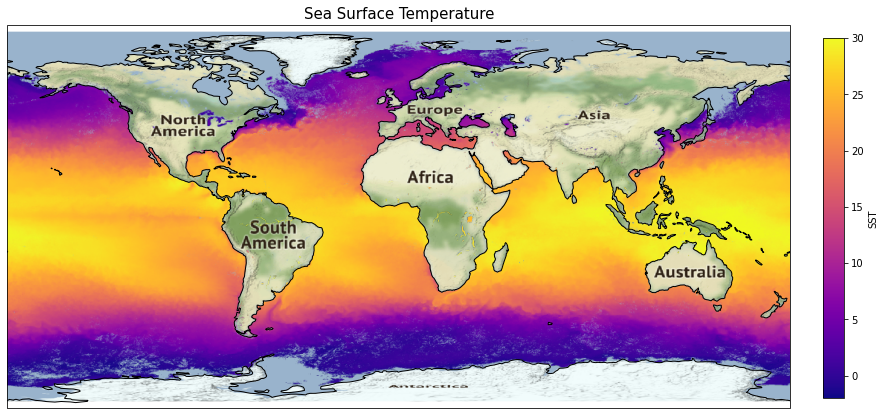

In [13]:
fig = plt.figure(figsize=(15, 10))

# plot the result with cartoee using a PlateCarre projection (default)
ax = cartoee.get_map(
    ocean,
    cmap='plasma',
    vis_params=visualization,
    region=bbox,
    basemap=cimgt.Stamen('terrain'),
    zoom_level=2,
)
cb = cartoee.add_colorbar(ax, vis_params=visualization, loc='right', cmap='plasma')

ax.set_title(label='Sea Surface Temperature', fontsize=15)

ax.coastlines()

# Save the plot by calling plt.savefig() BEFORE plt.show()
plt.savefig('sst.pdf')
plt.savefig('sst.jpg', dpi=300)

plt.show()